# 1.File Upload

In [ ]:
from google.colab import files
files.upload()

# 2.Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
file_name = 'obama_03.jpg'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [ ]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

In [ ]:
# -- 1. Load the cascades
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
  print('--(!)Error loading face Cascade')
  exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
  print('--(!)Error loading eyes Cascade')
  exit(0)

In [ ]:
img = cv2.imread(file_name)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

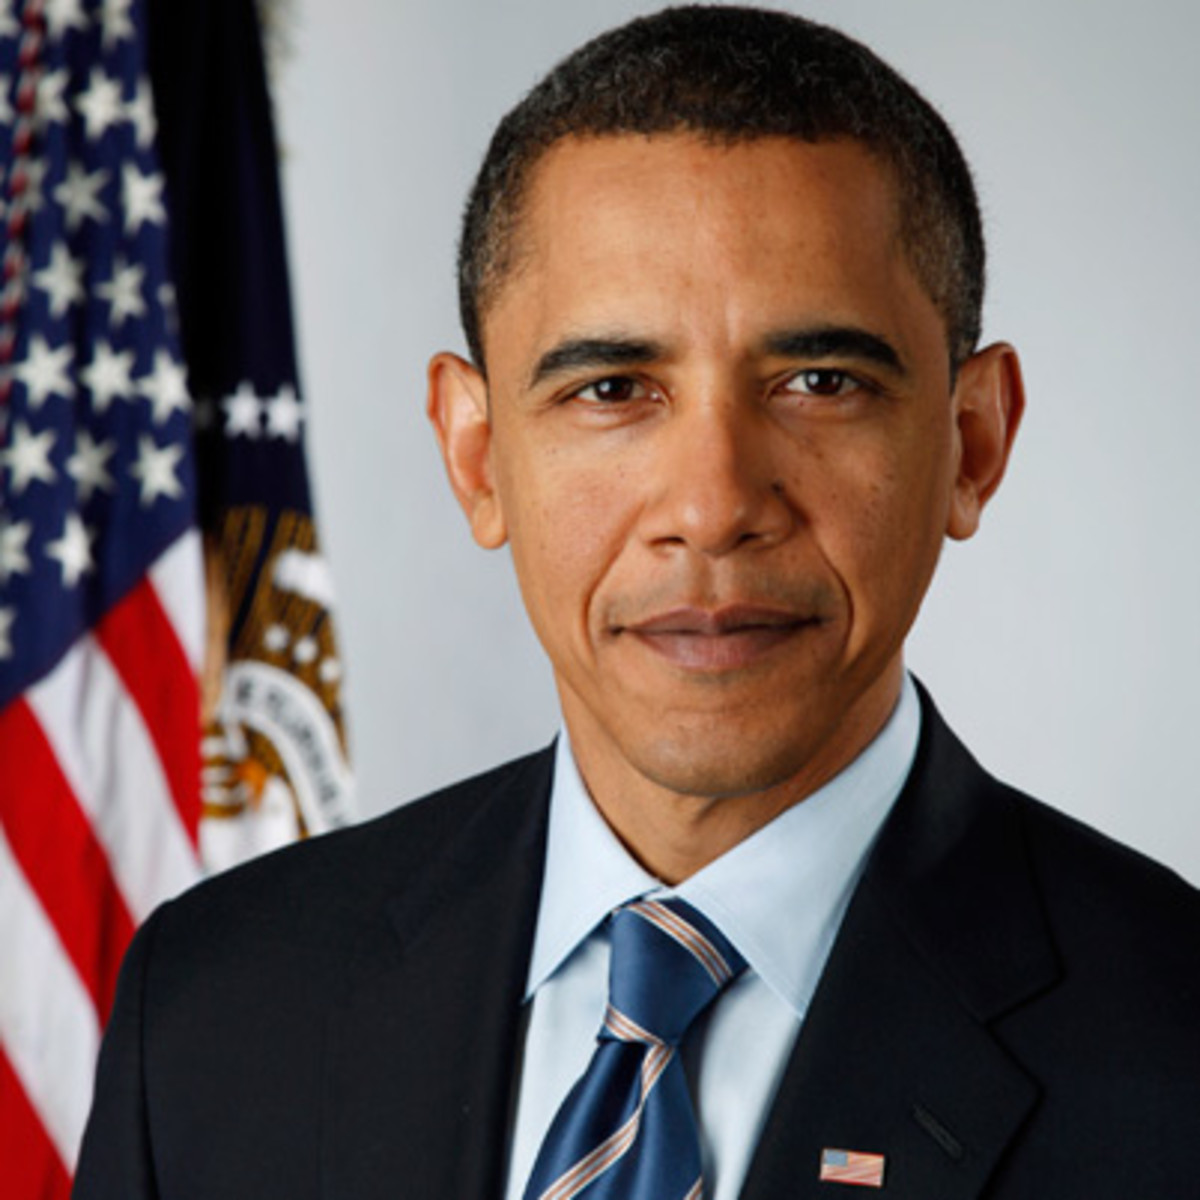

In [ ]:
cv2_imshow(img)

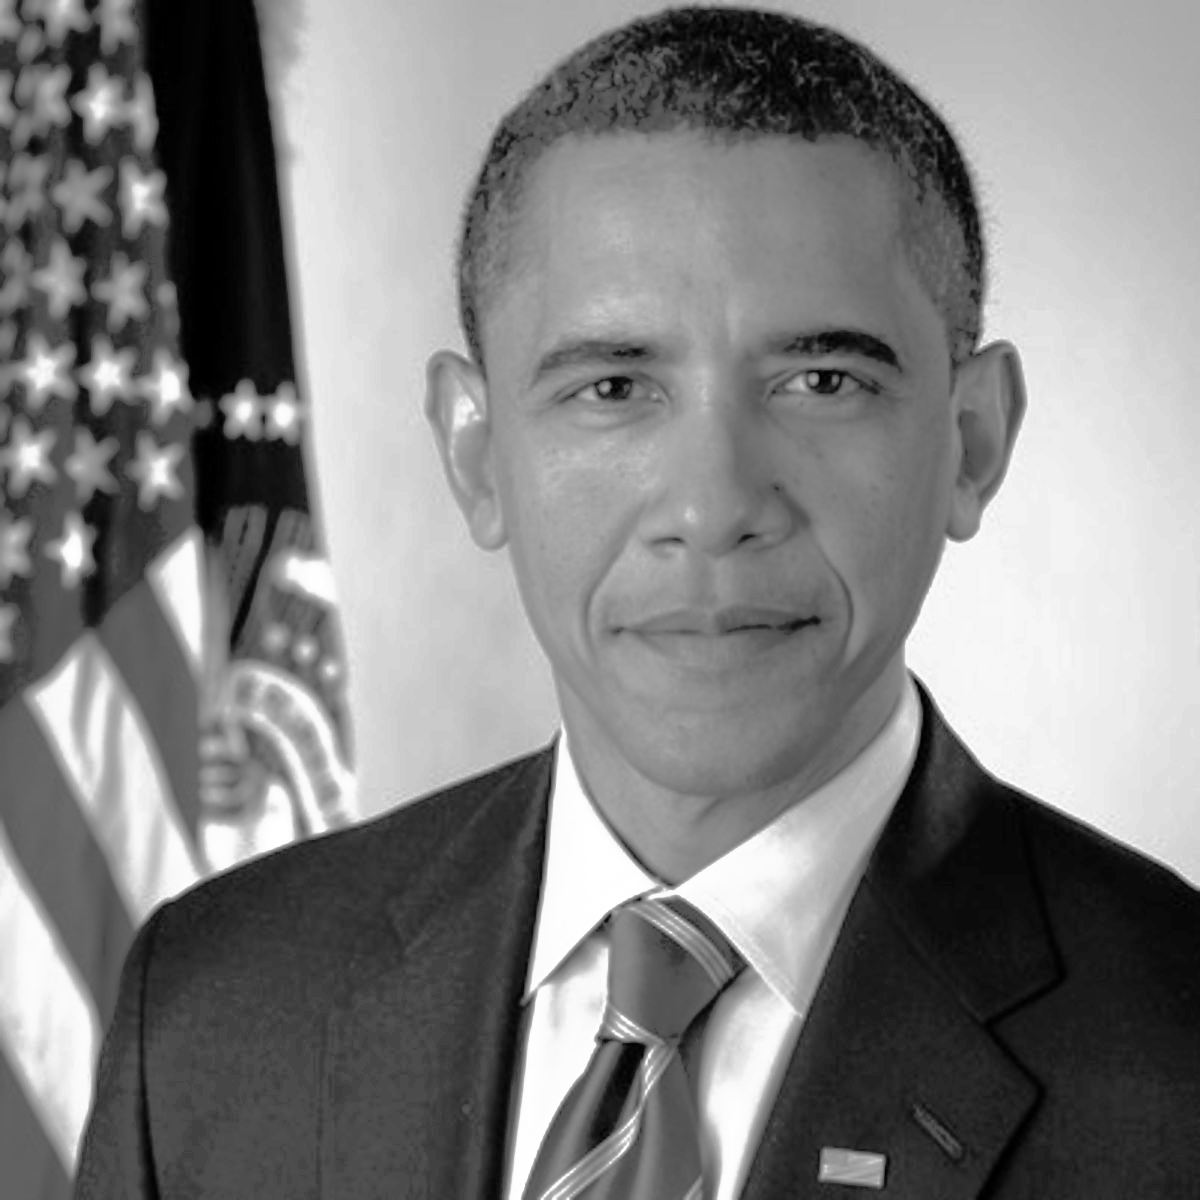

In [ ]:
cv2_imshow(gray)

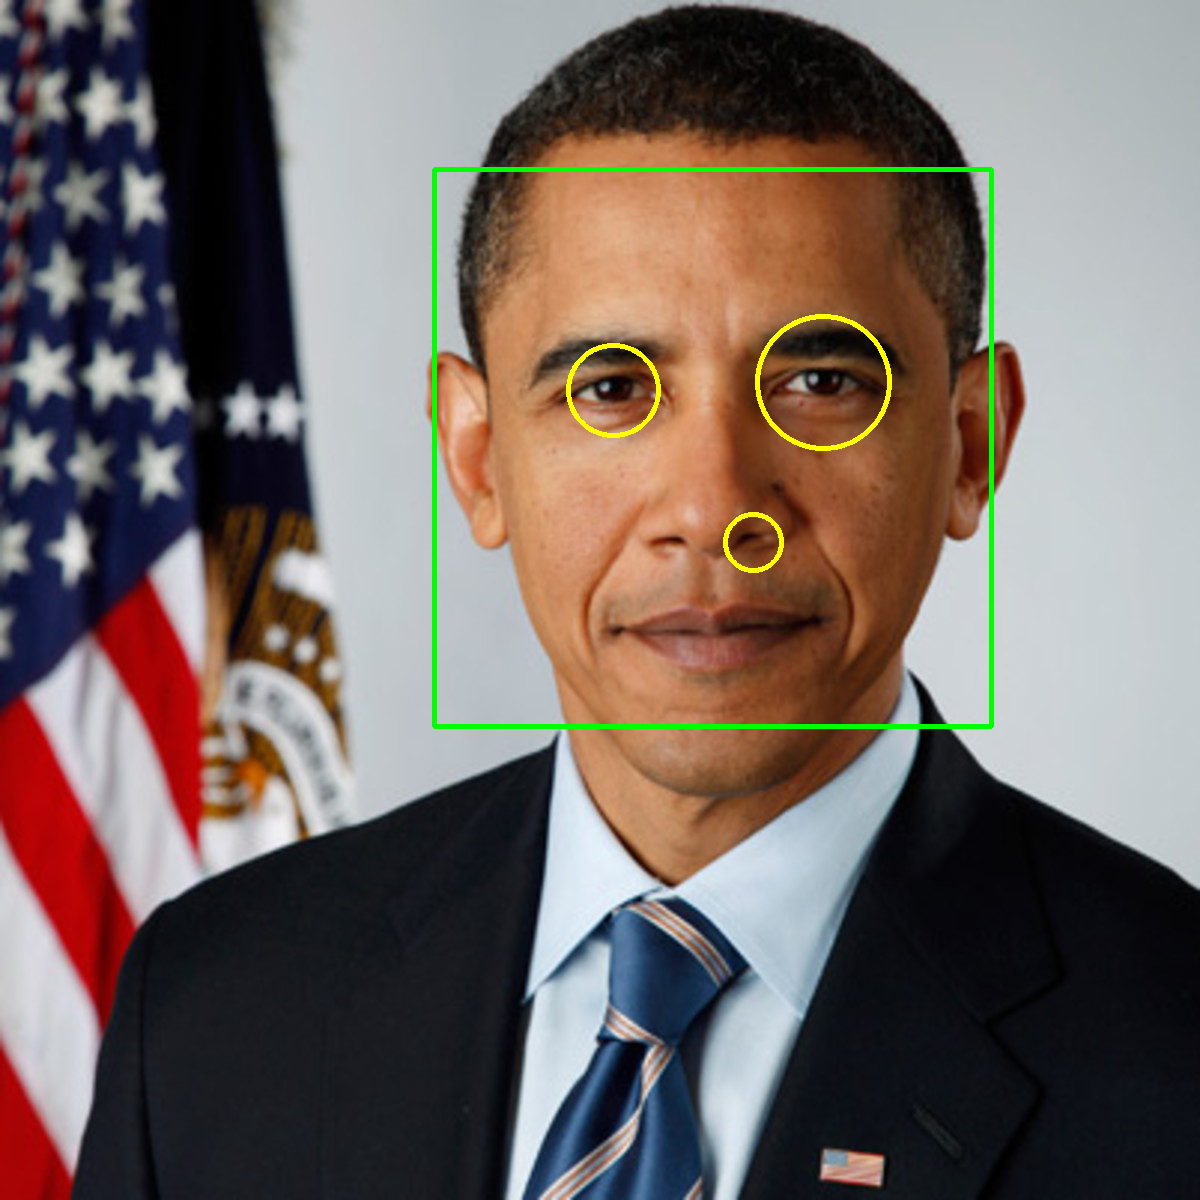

In [ ]:
faces = face_cascade.detectMultiScale(gray)
for (x, y, w, h) in faces:
  center = (x + w// 2, y + h//2)
  img = cv2.rectangle(img, (x,y), (x+w, y+h),(0, 255, 0),3)
  faceROI = gray[y:y+h, x:x+w]
  eyes = eyes_cascade.detectMultiScale(faceROI)
  for (x2, y2, w2, h2) in eyes:
    eye_center = (x + x2 + w2//2, y + y2 + h2 //2)
    radius = int(round((w2 + h2)*0.25))
    img = cv2.circle(img, eye_center, radius, (0, 255, 255), 3)
cv2_imshow(img)

# 1.File Upload

In [ ]:
from google.colab import files
files.upload()

Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses.xml
Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml
Saving obama_01.mp4 to obama_01.mp4


In [ ]:
!ls -al

# 2.Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython # 출력창 클리어

In [ ]:
file_name = 'obama_01.mp4'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [ ]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

In [ ]:
# -- 1. Load the cascades
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
  print('--(!)Error loading face Cascade')
  exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
  print('--(!)Error loading eyes Cascade')
  exit(0)

In [ ]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait = True) # IPython 환경에서 현재 출력된 내용을 지우고 새로운 내용을 표시하기 위한 명령
  frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 흑백으로 변경
  frame_gray = cv2.equalizeHist(frame_gray) # 히스토그램 평탄화
  # Dectect face
  face = face_cascade.detectMultiScale(frame_gray) # 얼굴 객체 저장
  for (x, y, w, h) in face:
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3) # 얼굴 객체 사각형 그리기
    faceROI = frame_gray[y:y+h, x:x+w] # 검출된 얼굴 객체 잘라내기
    # Dectect eyes
    eyes = eyes_cascade.detectMultiScale(faceROI) # 얼굴 안 눈 객체 저장
    for (x2, y2, w2, h2) in eyes:
      eyes_center = (x + x2+w2//2, y+y2+h2//2) # 눈 중심 추출
      radius = int(round(w2+h2)*0.25) # 눈 중심 반경 원 생성
      frame = cv2.circle(frame, eyes_center, radius, (255, 0, 0), 3)  # 눈 중심 반경 원 그리기
  cv2_imshow(frame) # 결과 보여주기

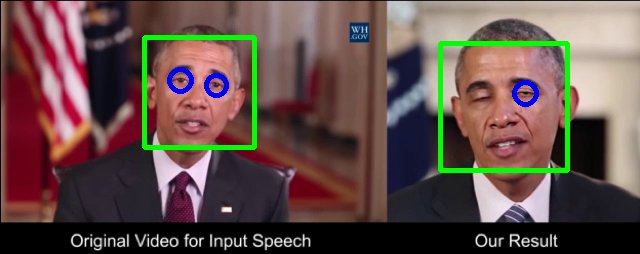

--(!) No captured frame -- Break!


In [ ]:
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print('--(!)Error opening video capture')
  exit(0)
while True:
  re, frame = cap.read()
  if frame is None:
    print('--(!) No captured frame -- Break!')
    break
  detectAndDisplay(frame)